### Citation
To acknowledge use of the dataset in publications, please cite the following paper:

F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4, Article 19 (December 2015), 19 pages. DOI=http://dx.doi.org/10.1145/2827872

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
data_fp = os.path.join('~', 'git', 'netflix_challenge', 'data', 'ml-latest-small')

# The movie/rating datasets

In [3]:
df_tags = pd.read_csv(os.path.join(data_fp, 'tags.csv'))
df_links = pd.read_csv(os.path.join(data_fp, 'links.csv'))
df_movies = pd.read_csv(os.path.join(data_fp, 'movies.csv'))
df_ratings = pd.read_csv(os.path.join(data_fp, 'ratings.csv'))

In [4]:
df_tags.head()

,userId,movieId,tag,timestamp
0,15,339,sandra 'boring' bullock,1138537770
1,15,1955,dentist,1193435061
2,15,7478,Cambodia,1170560997
3,15,32892,Russian,1170626366
4,15,34162,forgettable,1141391765


In [5]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [6]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


# Descriptive Questions
- What's the most popular movie
- Most popular genre of movie per year
- Clusters of users
- After a movie of genre X which other genre is watched
- number rating per year
- Correlation between number movies watched and average score given
- Relation between years and genres
- Relation between ratings and genre
- relation between ratings and year
- Clusters of movies
- Correlations between genres

# Task 1 Part b) Data preprocessing
1. Make a data matrix G that expresses the association between movies and genres
    - movieID (rows) and Genres (cols) - Surprises, some MovieIDs don't correspond to a movie.
2. Plot the number of movies per genre
    - some movies may not carry a genre. What does this look like?
3. Visualize the tendency of genres to co-occur in the samemovies
    - Hint: a useful tool is the matplotlib function imshow
    - genres vs genres with a count 

In [8]:
unique_genres = df_movies.genres.unique()
genre_list = []
for i in range(len(unique_genres)):
    x = unique_genres[i].split('|')
    genre_list.append(x) # ends up with a list of lists 
    flat_list = [item for sublist in genre_list for item in sublist]

# order in alphabetical order genre find the correspinding number 
genre_list = sorted(set(flat_list))
genre_dict = {}
for i in range(len(genre_list)): 
    genre_dict[genre_list[i]] = i

# create an zero matrix n x m
G = np.zeros((max(df_movies.movieId)+1,len(genre_list)))

# assign a 1 where movie id and genre are associated
for movie_id, genres in df_movies[['movieId', 'genres']].values:
    for genre in genres.split('|'):
        g = genre_dict[genre]
        G[movie_id,g] = 1     

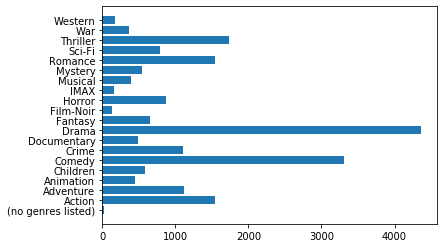

In [9]:
# Plot
num_movies = np.sum(G, axis=0)
plt.barh(genre_list, num_movies)
plt.show()

A good way to handle this problem is to standardize the data so that all standardize
variables are given a mean of zero and a standard deviation of one. Then
all variables will be on a comparable scale.

In [46]:
Gs = (G - np.mean(G, axis=0, keepdims=True))/np.std(G, axis=0, keepdims=True)

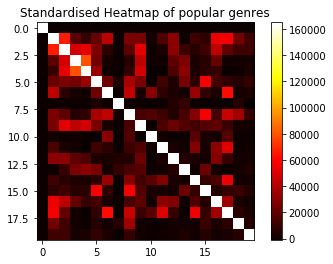

In [48]:

im = plt.imshow(np.dot(Gs.T, Gs))
im.set_cmap('hot')
plt.title('Standardised Heatmap of popular genres')
plt.colorbar();

# To improve we could normalise this data

# Task 1 Part c) Statistics
1. Compute and visualize the following:
    - histogram of number of genres per movie
    - histogram of number of movies per user
    - histogram of number of users per movie
    - histogram of average score per movie

In [40]:
# Number of genre per movie - SKIPPED


# Task 2 Part a) Changing basis
1. Determine a more convenient basis to represent the movie-users score matrix
    - 100004 ratings and 1296 tag applications across 9125 movies with 671 users
    - Find a better basis for this data. Rather than having every movie with 600 possible users, we could create a weight/feature for a type of user. E.g. There will be users who likes action, users who like a mixture of movies like action and romance. 
2. Plot the reconstruction quality with respect to the number of singular vectors
    - How good is our new basis? Think of the fish example from the lectures. 

In [44]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [62]:
sorted(df_ratings.rating.unique()) 

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

In [85]:
# Some movies have not been rated
len(df_movies.movieId.unique()), len(df_ratings.movieId.unique()) 

(9125, 9066)

We can fill no rating with 0 as it is not a rating value, but if we want to average then we will need to use pandas with will ignore nan. Luckily we don't

In [86]:
df_ru = df_ratings.pivot(values='rating', index='movieId', columns='userId').fillna(0); 
R = np.mat(df_ru)
y = df_ru.index # to map movie id to numpy index later
df_ru.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,...,0.0,4.0,3.5,0.0,0.0,0.0,0.0,0.0,4.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
U, S, Vh = np.linalg.svd(R)
r = 4
S_diag = np.diag(S)
M_prime = U[:, :r].dot(S_diag[:r, :r]).dot(Vh[:r, :])

In [97]:
M_prime[0, 7], M_prime[0, 9]

(2.1262497985342037, 0.5424976616360855)

In [ ]:
# This will advise on linear e.g. how good is this linear model

def plot_fraction_explained(s):
    tot = np.sum(s)
    ss = s/tot
    cumul = []
    c=0
    for v in ss:
        c+=v
        cumul.append(c)
    plt.plot(cumul)
    plt.grid()
    plt.show()
    
plot_fraction_explained(s)

# Task 2 Part b) Explain principal directions
1. Encode users according to the genres they like
    - what is the relationship between users and genres. What associations can we make?
2. Encode movies according to SVD decomposition of movieuser score matrix
3. How can we interpret the information captured by the SVD basis?
4. Explain SVD basis according to genres: for each basis vector report the k most positively associated genres and the k most negatively associated genres

In [ ]:
G.shape, D.shape

# Task 2 Part c) Understand the axis
1. Plot the loading of each genre for the first 10 basis vectors

# Task 3 Part a) Movies visualization
1. Make a 2D plotting function using two arbitrary SVD basis vectors to project all movies.
2. For efficiency reasons, exclude movies that are too close to the origin.
3. Find movies that, in the chosen 2D representation, are closest to a regularly spaced grid and display their titles on the plot.

# Task 3 Part b) Movie info
1. Plot the coordinates for a movie given its id.

# Task 3 Part c) Movie in context
1. Find movie id from words in the title
2. Select two axis and report
3. movie info
4. both axis info
5. marked movie in movies 2D plot

# Task 4 Part a) Predict user score
1. Select 4000 scores at random from users at random.
    - it will be based on the principal components
2. Replace these scores with the average score for the corresponding movie to simulate missing values.
3. Using the truncated SVD decomposition with 400 singular vectors approximate the missing scores.
4. Evaluate the accuracy of the reconstruction using a scatter plot.

In [103]:
def inpute(M, r):
    """
    Return the reconstruction of matrix M of r singular
    vectors and values. A matrix completion problem using 
    expectation maximization. 
    """
    
    # Compute the singular values (Σ) and vectors (U, V)
    U, Σ, Vh = np.linalg.svd(M) 
    Σ_diag = np.diag(Σ) 
    # Truncate by r and compute the estimated matrix
    M_prime = U[:, :r].dot(Σ_diag[:r, :r]).dot(Vh[:r, :])
    
    return M_prime

D = inpute(R, r=20)

In [109]:
# calculate the column mean for each of the columns
df_ru = df_ratings.pivot(values='rating', index='movieId', columns='userId')
means = df_ru.mean()
means[:5]
# calculate

userId
1    2.550000
2    3.486842
3    3.568627
4    4.348039
5    3.910000
dtype: float64

# Task 4 Part b) classification for individual movie
1. Select a movie at random that has been seen by many users.
2. Consider only the users that have scored the movie.
3. Assume that a score above, say, 4.5 is positive and below negative. This is the target that needs to be predicted.
    - Note: remove the movie score information from the data matrix (e.g. by setting all score entries to 0).
4. Consider a 50% split between positive and negative users.
5. Build a classification algorithm for the problem (no external library such as `scikit`).
6. Compute the accuracy and the baseline accuracy (i.e. the accuracy of a random classifier).